# **Capstone Assignment 20.1: Initial Report & Exploratory Data Analysis (EDA)**

**Research Question:**

Can we predict heart disease in people by looking at their basic personal and health information?

**Expected Data Source:**

The data will come from a dataset "https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset?select=heart_disease.csv" called heart_disease.csv, which includes basic personal and health information, provided as a CSV file.

**Techniques:**

Simple data analysis to understand the data

**Creating useful features from the data**

Using machine learning methods (like Logistic Regression, Decision Trees, Random Forest, and Gradient Boosting)

Checking how well the model works using methods like cross-validation, confusion matrix, and ROC curve.

**Expected Results:**

I aim to create a reliable tool that can predict who might develop heart disease based on their basic personal and health details. This tool will show us which factors are most important for predicting heart disease, helping doctors and patients take action early.

**Why This Question is Important:**

Heart disease is a major cause of death around the world. If we can predict heart disease early, we can help people make lifestyle changes or get medical treatment sooner. Without answering this question, people might not know they are at risk, missing the chance to prevent serious health issues. A simple predictive tool can help doctors and patients make better decisions, saving lives and reducing healthcare costs by allowing earlier treatment and better personal care plans.


**1. Import Libraries & Load Dataset**

In [3]:
# 1.1 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For consistent plot styles
sns.set(style="whitegrid")

In [38]:
# 1.2  Load the dataset
df = pd.read_csv('heart_disease.csv')

**2. Data Overview & Initial Checks**

In [39]:
# 2.1 Preview the dataset
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [40]:
# 2.2 Check data types and non-null values
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usa

In [41]:
# 2.3 Check the shape of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (4238, 16)


In [42]:
# 2.4 Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64


In [43]:
# 2.5 View basic statistics for numeric columns
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               age  currentSmoker   cigsPerDay       BPMeds  prevalentHyp  \
count  4238.000000    4238.000000  4209.000000  4185.000000   4238.000000   
mean     49.584946       0.494101     9.003089     0.029630      0.310524   
std       8.572160       0.500024    11.920094     0.169584      0.462763   
min      32.000000       0.000000     0.000000     0.000000      0.000000   
25%      42.000000       0.000000     0.000000     0.000000      0.000000   
50%      49.000000       0.000000     0.000000     0.000000      0.000000   
75%      56.000000       1.000000    20.000000     0.000000      1.000000   
max      70.000000       1.000000    70.000000     1.000000      1.000000   

          diabetes      totChol        sysBP        diaBP          BMI  \
count  4238.000000  4188.000000  4238.000000  4238.000000  4219.000000   
mean      0.025720   236.721585   132.352407    82.893464    25.802008   
std       0.158316    44.590334    22.038097    11.910850  

In [44]:
# 2.6 Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [45]:
# 2.7 Check unique values for categorical variables
print("\nUnique values in categorical features:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values in categorical features:
Gender: 2 unique values
education: 4 unique values
prevalentStroke: 2 unique values
Heart_ stroke: 2 unique values


**3. Data Cleaning**

In [46]:
# 3.1 Make a copy of the dataset
df_clean = df.copy()

In [47]:
# 3.2 Clean column names (remove spaces, fix inconsistent naming)
df_clean.columns = df_clean.columns.str.strip().str.replace(' ', '').str.replace('-', '')

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_stroke     4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [49]:
# 3.3 Rename target column for clarity
df_clean.rename(columns={'Heart_stroke': 'HeartStroke'}, inplace=True)

In [50]:
# 3.4 Handling missing values
# Impute numerical columns with median
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Impute categorical columns with mode
cat_cols = df_clean.select_dtypes(include='object').columns
for col in cat_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [51]:
# 3.5 Convert categorical columns to lowercase to avoid for example 'No' vs 'no' issues
for col in cat_cols:
    df_clean[col] = df_clean[col].str.lower().str.strip()

In [52]:
# 3.6 Preview cleaned data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4238 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  HeartStroke      4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [19]:
# 3.7 Check for missing values in each column
df_clean.isnull().sum()

,0
Gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


**Outlier Analysis**

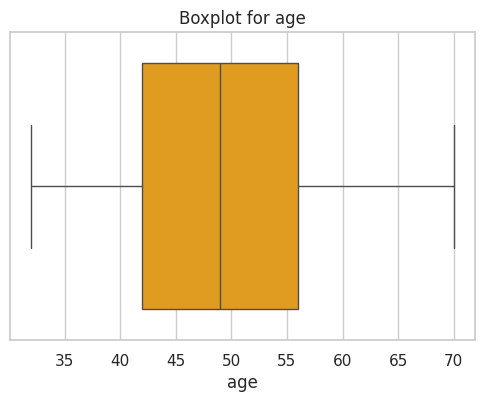

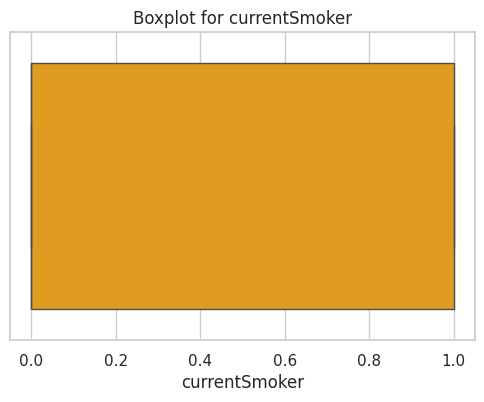

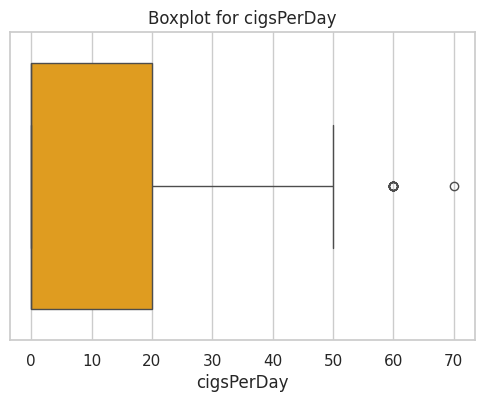

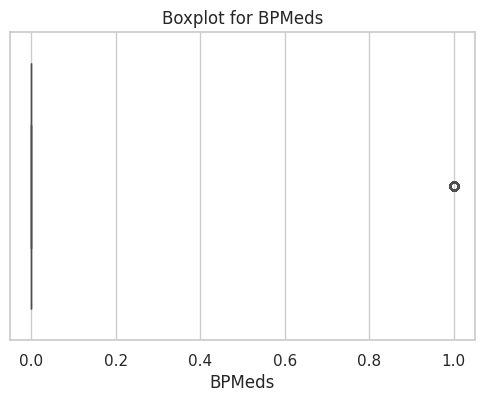

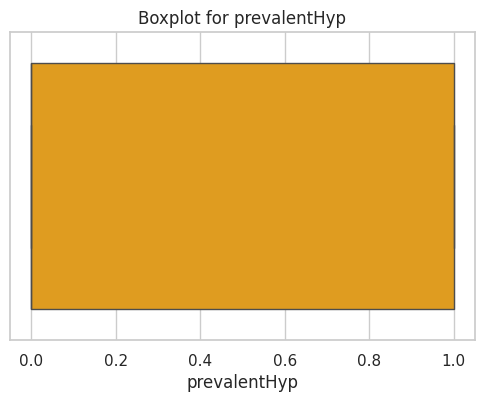

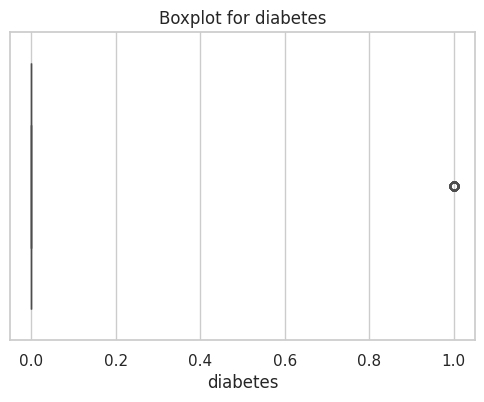

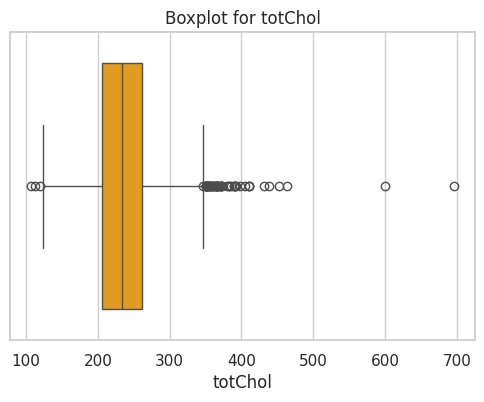

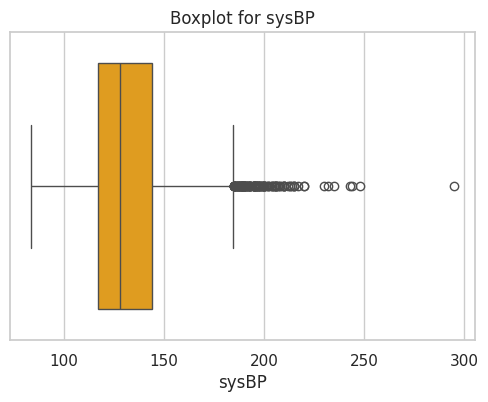

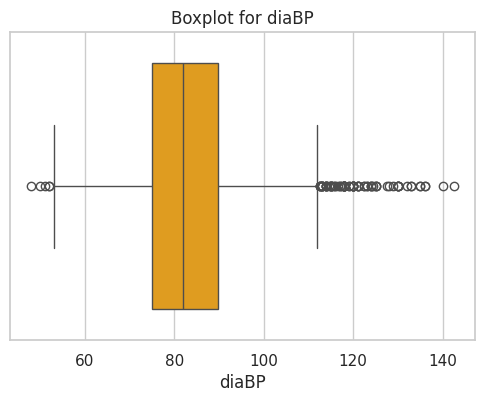

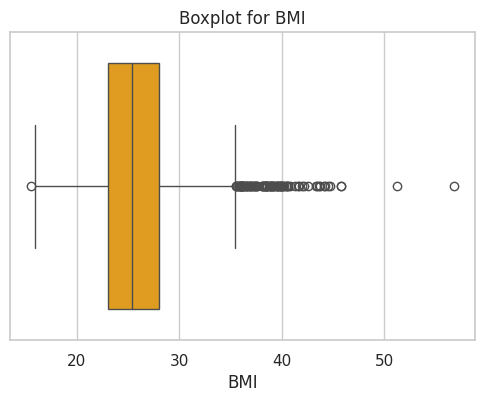

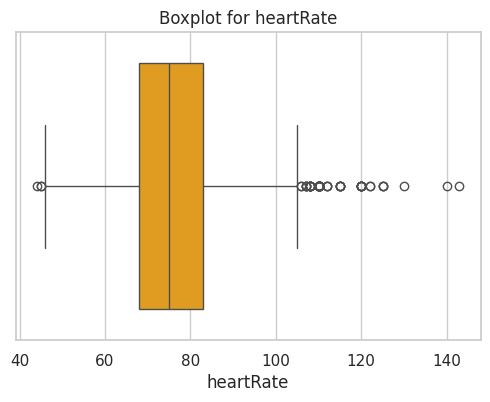

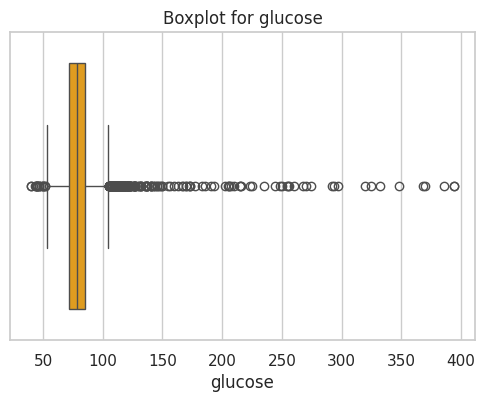

In [85]:
# 3.8 Outlier Analysis

numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Visualize boxplots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_clean[col], color='orange')
    plt.title(f'Boxplot for {col}')
    plt.show()

In [90]:
# Define a function to cap outliers using IQR method
def cap_outliers(df, columns):
    df_capped = df.copy()  # Create a copy so we don't modify original
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap lower and upper values
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])

    return df_capped

# Apply the capping function to all numeric columns
df_clean_capped = cap_outliers(df_clean, numeric_cols)

# Check new basic statistics
df_clean_capped.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4238.000000,4238.0,4238.000000,4238.0,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,49.584946,0.494101,8.910807,0.0,0.310524,0.0,236.191600,131.913285,82.733291,25.715456,75.750590,79.452100
std,8.572160,0.500024,11.781028,0.0,0.462763,0.0,42.297346,20.647252,11.389783,3.788664,11.623371,11.455286
min,32.000000,0.000000,0.000000,0.0,0.000000,0.0,122.000000,83.500000,52.687500,15.643750,45.500000,52.500000
25%,42.000000,0.000000,0.000000,0.0,0.000000,0.0,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000
50%,49.000000,0.000000,0.000000,0.0,0.000000,0.0,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.0,1.000000,0.0,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000
max,70.000000,1.000000,50.000000,0.0,1.000000,0.0,346.000000,184.500000,112.187500,35.473750,105.500000,104.500000


In [93]:
# Define a function to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Find outliers in
# Loop through each numeric column
for col in numeric_cols:
    outliers = detect_outliers(df_clean, col)  # Use your function
    print(f'Number of outliers in {col}: {len(outliers)}')

Number of outliers in age: 0
Number of outliers in currentSmoker: 0
Number of outliers in cigsPerDay: 12
Number of outliers in BPMeds: 124
Number of outliers in prevalentHyp: 0
Number of outliers in diabetes: 109
Number of outliers in totChol: 57
Number of outliers in sysBP: 126
Number of outliers in diaBP: 81
Number of outliers in BMI: 97
Number of outliers in heartRate: 76
Number of outliers in glucose: 262


In [94]:
# Save df_clean to a CSV file
df_clean.to_csv('df_clean.csv', index=False)

In [112]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Keep only rows within bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply to df_clean
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
df_clean_no_outliers = remove_outliers(df_clean, numeric_cols)

# Check new shape
print("Original shape:", df_clean.shape)
print("New shape after removing outliers:", df_clean_no_outliers.shape)

Original shape: (4238, 17)
New shape after removing outliers: (3510, 17)


In [113]:
# Save df_clean_no_outliers to a CSV file
df_clean.to_csv('df_clean_no_outliers.csv', index=False)

**4. Visual Exploratory Data Analysis (EDA)**

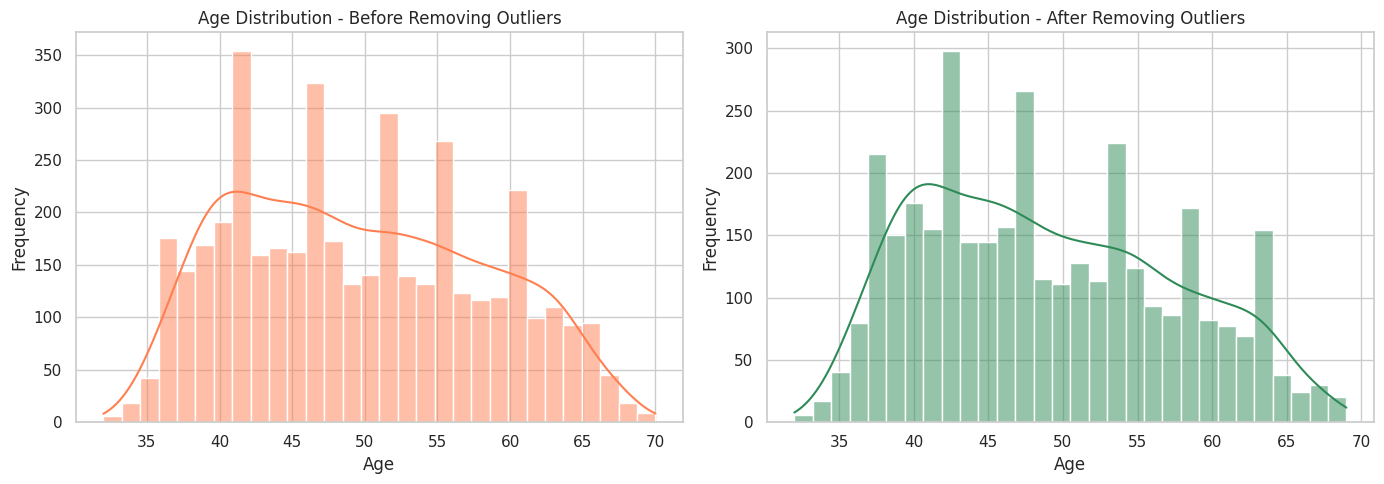

In [115]:
# 4.1 Distribution Plots
# Histogram of Age
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Age distribution in df_clean (before removing outliers)
sns.histplot(data=df_clean, x='age', kde=True, bins=30, color='coral', ax=axes[0])
axes[0].set_title('Age Distribution - Before Removing Outliers')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot 2: Age distribution in df_clean_no_outliers (after removing outliers)
sns.histplot(data=df_clean_no_outliers, x='age', kde=True, bins=30, color='seagreen', ax=axes[1])
axes[1].set_title('Age Distribution - After Removing Outliers')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**@finding:**

The side-by-side comparison of Age distribution shows that removing outliers had minimal impact on the overall age distribution, confirming that the dataset is stable in this feature

The age distribution is approximately normal, with most individuals falling between 40 and 60 years old. This suggests the dataset mainly includes middle-aged adults, a group at higher risk for heart disease and stroke.

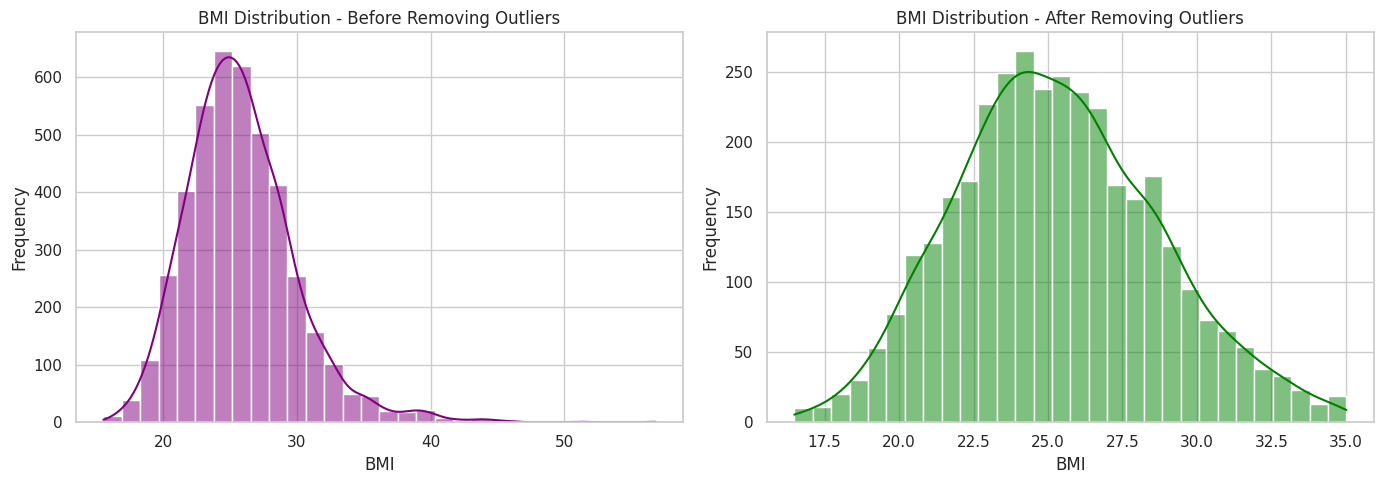

In [119]:
# 4.2 Distribution Plots
# Histogram of BMI
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: BMI distribution in df_clean (before removing outliers)
sns.histplot(data=df_clean, x='BMI', kde=True, bins=30, color='purple', ax=axes[0])
axes[0].set_title('BMI Distribution - Before Removing Outliers')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')

# Plot 2: BMI distribution in df_clean_no_outliers (after removing outliers)
sns.histplot(data=df_clean_no_outliers, x='BMI', kde=True, bins=30, color='green', ax=axes[1])
axes[1].set_title('BMI Distribution - After Removing Outliers')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**@finding:**

The BMI distribution is right-skewed, meaning more people are slightly overweight or obese. A few individuals have high BMI values above 40, which are considered extreme and may be outliers.

The side-by-side comparison shows that removing outliers made the BMI distribution tighter and reduced extreme values above 40.

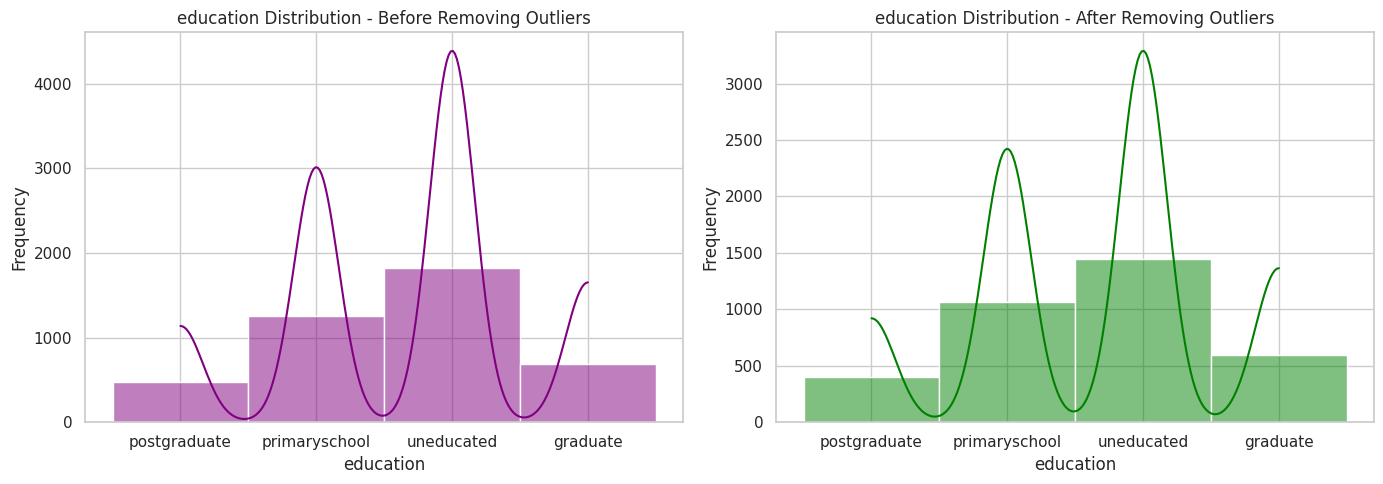

In [121]:
# 4.3 Distribution Plots
# education distribution
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: BMI distribution in df_clean (before removing outliers)
sns.histplot(data=df_clean, x='education', kde=True, bins=30, color='purple', ax=axes[0])
axes[0].set_title('education Distribution - Before Removing Outliers')
axes[0].set_xlabel('education')
axes[0].set_ylabel('Frequency')

# Plot 2: BMI distribution in df_clean_no_outliers (after removing outliers)
sns.histplot(data=df_clean_no_outliers, x='education', kde=True, bins=30, color='green', ax=axes[1])
axes[1].set_title('education Distribution - After Removing Outliers')
axes[1].set_xlabel('education')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**@finding:**

There are more people with low education (primary or no schooling) than with higher education (graduate or postgraduate).

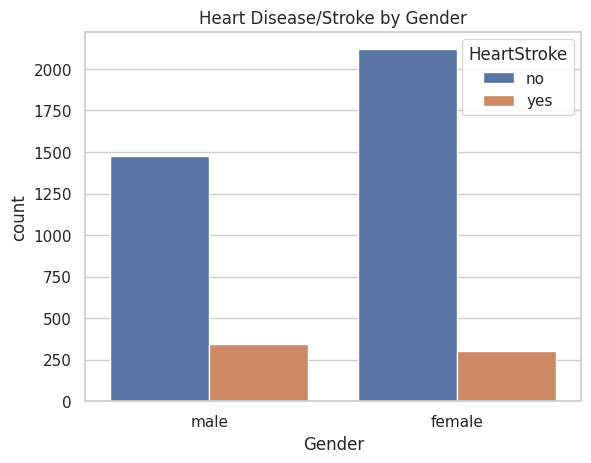

In [108]:
# 4.4 Bar Plots for Categorical vs Target (HeartStroke)
# Gender vs HeartStroke
sns.countplot(data=df_clean, x='Gender', hue='HeartStroke')
plt.title('Heart Disease/Stroke by Gender')
plt.show()

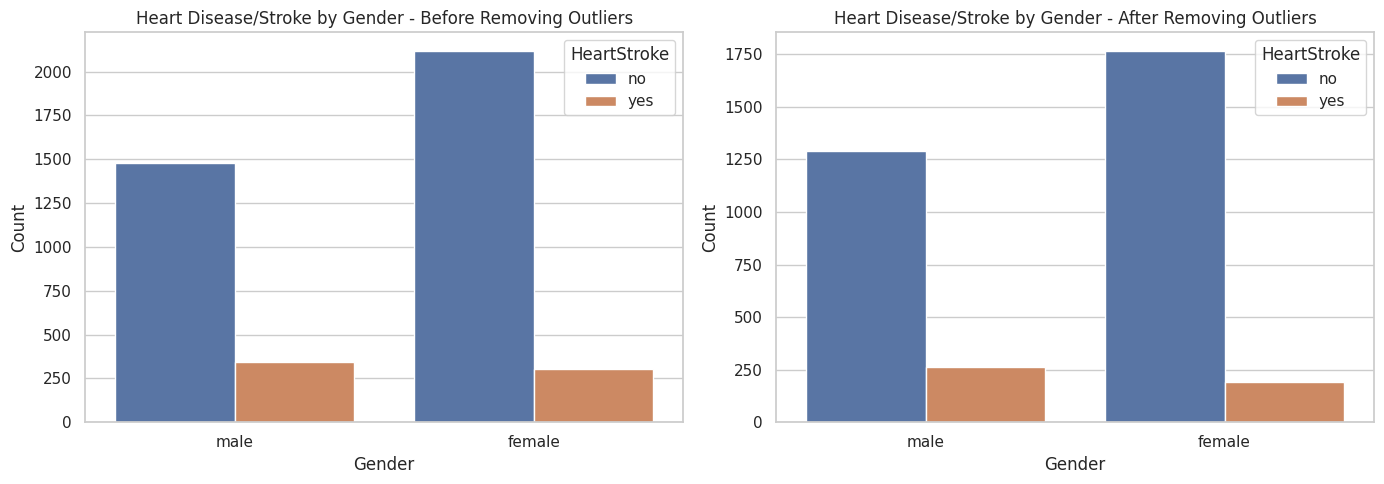

In [122]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: df_clean (before removing outliers)
sns.countplot(data=df_clean, x='Gender', hue='HeartStroke', ax=axes[0])
axes[0].set_title('Heart Disease/Stroke by Gender - Before Removing Outliers')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot 2: df_clean_no_outliers (after removing outliers)
sns.countplot(data=df_clean_no_outliers, x='Gender', hue='HeartStroke', ax=axes[1])
axes[1].set_title('Heart Disease/Stroke by Gender - After Removing Outliers')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**@finding:**

Both males and females are represented in the dataset. However, the number of people with heart disease/stroke appears slightly higher among males. This could indicate a higher risk among male participants, though more analysis is needed.

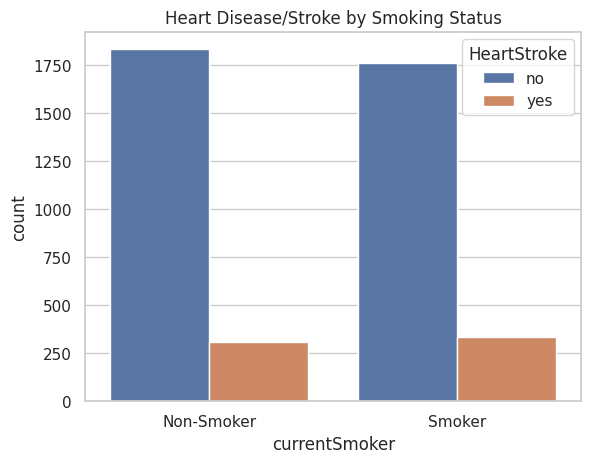

In [107]:
# 4.5 Bar Plots for Categorical vs Target (HeartStroke)
# Smoking status vs HeartStroke
sns.countplot(data=df_clean, x='currentSmoker', hue='HeartStroke')
plt.title('Heart Disease/Stroke by Smoking Status')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

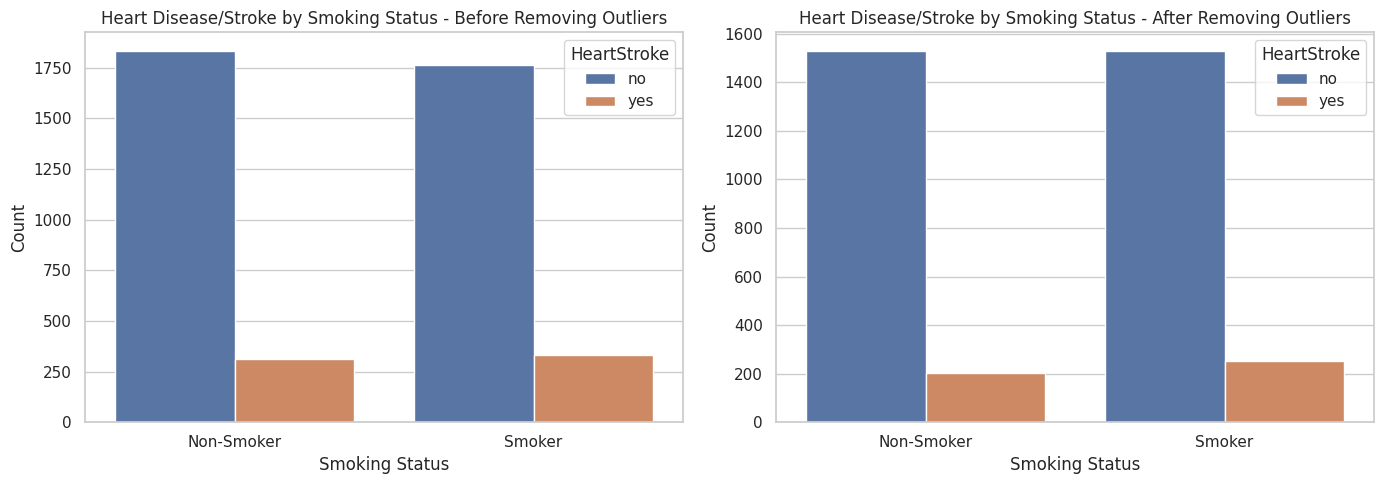

In [125]:
# Create side-by-side plots

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: df_clean (before removing outliers)
sns.countplot(data=df_clean, x='currentSmoker', hue='HeartStroke', ax=axes[0])
axes[0].set_title('Heart Disease/Stroke by Smoking Status - Before Removing Outliers')
axes[0].set_xlabel('Smoking Status')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])  # Set positions
axes[0].set_xticklabels(['Non-Smoker', 'Smoker'])  # Set labels

# Plot 2: df_clean_no_outliers (after removing outliers)
sns.countplot(data=df_clean_no_outliers, x='currentSmoker', hue='HeartStroke', ax=axes[1])
axes[1].set_title('Heart Disease/Stroke by Smoking Status - After Removing Outliers')
axes[1].set_xlabel('Smoking Status')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])  # Set positions
axes[1].set_xticklabels(['Non-Smoker', 'Smoker'])  # Set labels

plt.tight_layout()
plt.show()

**@finding:**

Smokers are more likely to be in the heart disease/stroke group than non-smokers. This supports the well-known link between smoking and cardiovascular risk.

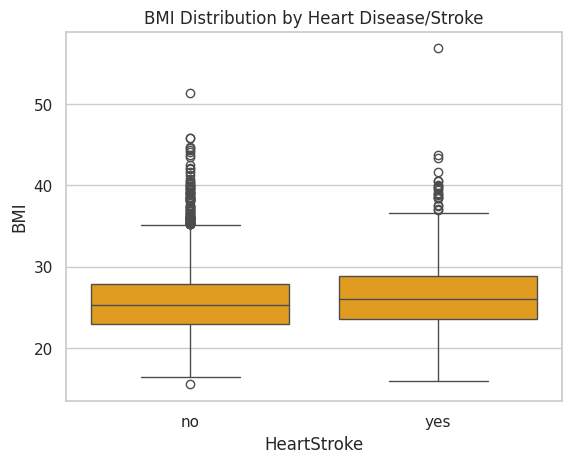

In [106]:
# 4.6 Boxplots (To Check Impact of Numeric on Target)
# BMI vs HeartStroke
sns.boxplot(data=df_clean, x='HeartStroke', y='BMI', color='orange')
plt.title('BMI Distribution by Heart Disease/Stroke')
plt.show()

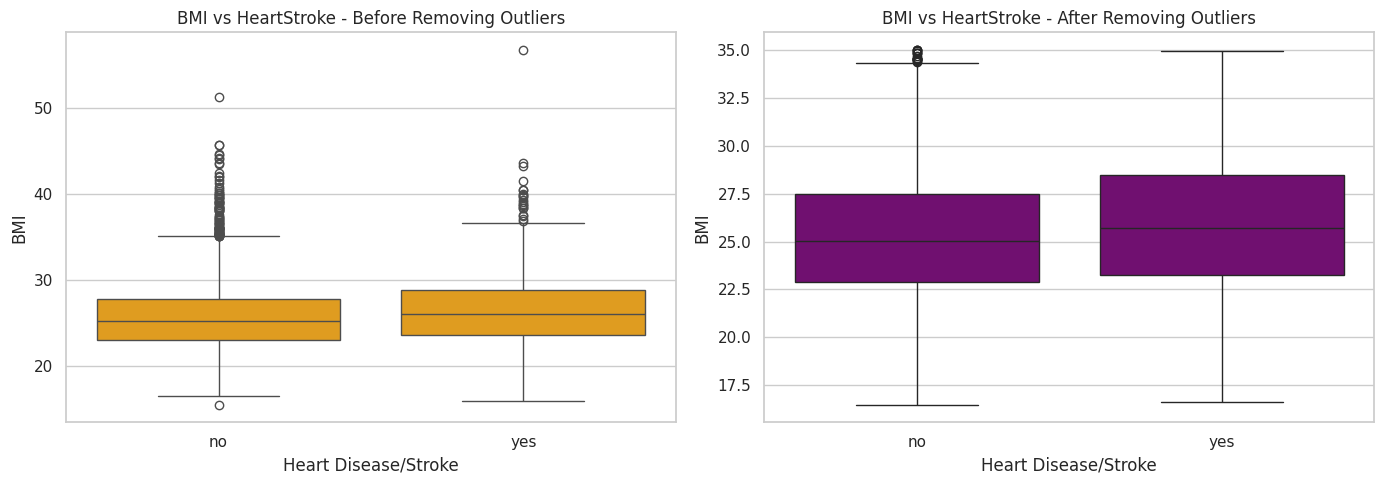

In [128]:
# Create side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot 1: Before Removing Outliers
sns.boxplot(data=df_clean, x='HeartStroke', y='BMI', color='orange', ax=axes[0])
axes[0].set_title('BMI vs HeartStroke - Before Removing Outliers')
axes[0].set_xlabel('Heart Disease/Stroke')
axes[0].set_ylabel('BMI')

# Boxplot 2: After Removing Outliers
sns.boxplot(data=df_clean_no_outliers, x='HeartStroke', y='BMI', color='purple', ax=axes[1])
axes[1].set_title('BMI vs HeartStroke - After Removing Outliers')
axes[1].set_xlabel('Heart Disease/Stroke')
axes[1].set_ylabel('BMI')

plt.tight_layout()
plt.show()

**@finding:**

The boxplot shows that individuals with heart disease or stroke tend to have slightly higher BMI on average. However, the difference is not dramatic, suggesting BMI may be a contributing factor, but not the strongest one.

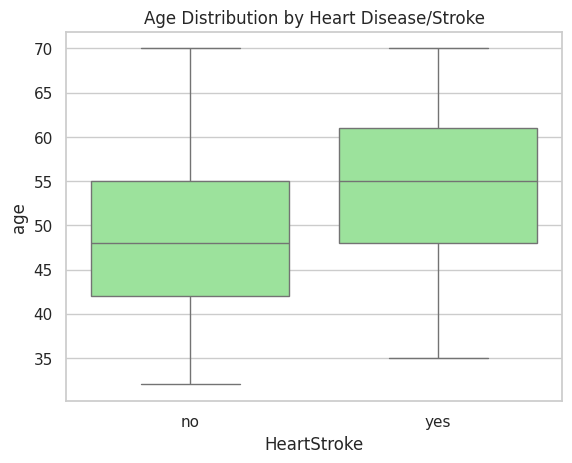

In [105]:
# 4.7 Age vs HeartStroke
sns.boxplot(data=df_clean, x='HeartStroke', y='age', color='lightgreen')
plt.title('Age Distribution by Heart Disease/Stroke')
plt.show()

**@finding:**

There is a clear trend: individuals who experienced heart disease or stroke tend to be older. This reinforces the role of age as a key risk factor in cardiovascular events.

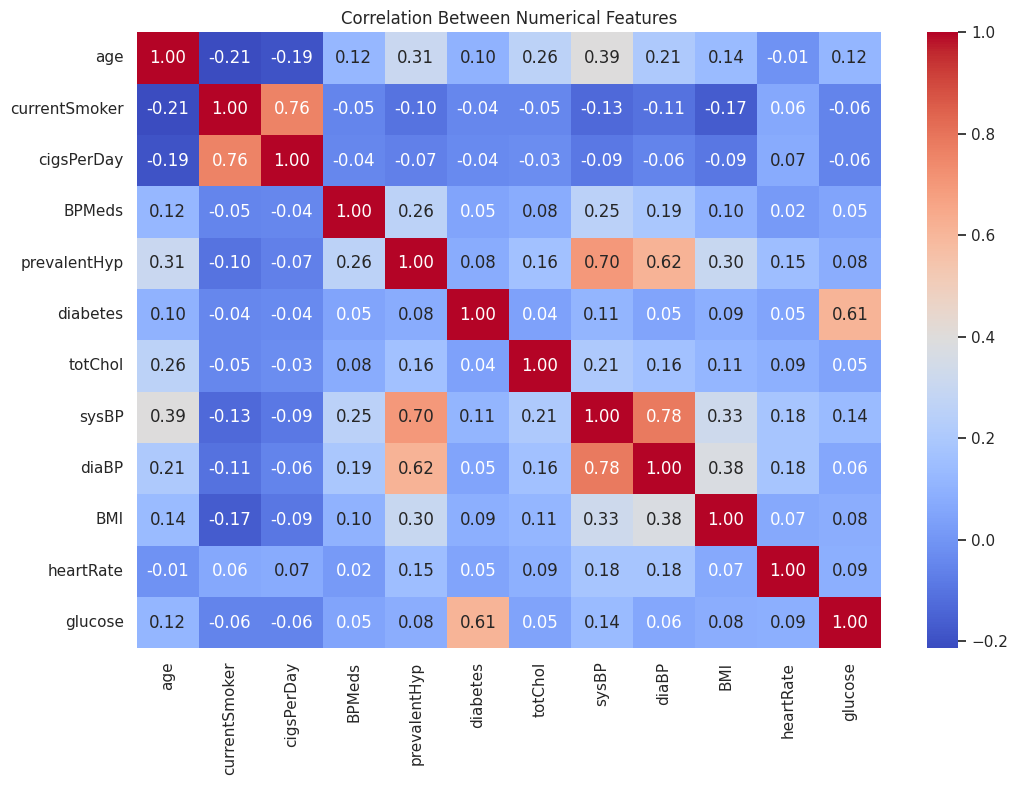

In [104]:
# 4.8 Correlation Heatmap (Numerical Features)
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Features')
plt.show()

**@finding:**

The heatmap highlights positive correlations between systolic blood pressure, BMI, and age with heart-related outcomes. It also shows that some variables like diastolic BP and heart rate are only weakly related to the target. This helps narrow down which variables may be most useful for prediction

In [133]:
# 4.9 Create BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese I'
    elif 35 <= bmi < 40:
        return 'Obese II'
    else:
        return 'Obese III'

# Apply function to the BMI column
df_clean_no_outliers['BMI_Category'] = df_clean_no_outliers['BMI'].apply(categorize_bmi)

# Check the value counts
df_clean_no_outliers['BMI_Category'].value_counts()

,count
BMI_Category,
Normal,1660
Overweight,1478
Obese I,324
Underweight,45
Obese II,3


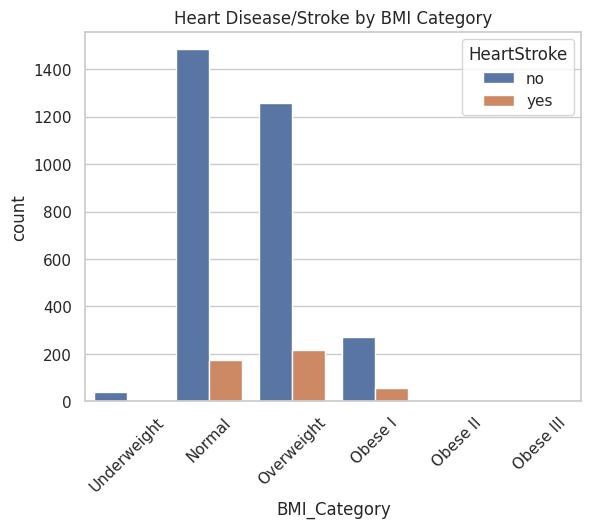

In [134]:
# 4.9 BMI Category vs Heart Disease/Stroke
sns.countplot(data=df_clean_no_outliers, x='BMI_Category', hue='HeartStroke', order=[
    'Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])
plt.title('Heart Disease/Stroke by BMI Category')
plt.xticks(rotation=45)
plt.show()

**@finding:**

People in the Overweight category appear to have higher risk than those at Normal weight.

Very high BMI (Obese II and III) might also increase risk, but the sample size is too small in the dataset to be confident.

Being "Normal" BMI doesn't completely protect against heart disease/stroke, other factors (like age, smoking, blood pressure) are likely at play.

5. Create a simple classification model to predict whether a person has heart disease/stroke using the available health features.

Baseline Model — Logistic Regression
I will use:

Features (like age, BMI, smoking status, blood pressure, etc.)

Target: HeartStroke (convert to binary: yes -> 1, no -> 0)

In [135]:
# 5.1 Encode the Target Variable
# Convert target column to binary numeric values
df_clean_no_outliers['HeartStroke'] = df_clean_no_outliers['HeartStroke'].map({'yes': 1, 'no': 0})

In [136]:
# 5.2 One-Hot Encode Categorical Variables
# Drop BMI category (it's a derived feature, optional)
df_model = df_clean_no_outliers.drop(columns=['BMI_Category'])

# One-hot encoding for all categorical variables
df_model = pd.get_dummies(df_model, drop_first=True)

In [137]:
# Remove rows where the target is missing
df_model = df_model[df_model['HeartStroke'].notna()]

# Just to be safe: drop any remaining rows with any NaN
df_model = df_model.dropna()

In [138]:
# Double-Check Size Before Splitting
print("Data shape after cleaning:", df_model.shape)

Data shape after cleaning: (3510, 18)


In [139]:
# 5.3 Split the Data
X = df_model.drop('HeartStroke', axis=1)
y = df_model['HeartStroke']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [140]:
# To check again
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("Target distribution:", y_train.value_counts(normalize=True))

Train size: (2808, 17)
Test size: (702, 17)
Target distribution: HeartStroke
0    0.874288
1    0.125712
Name: proportion, dtype: float64


In [147]:
# The Data

X = df_model.drop('HeartStroke', axis=1)
y = df_model['HeartStroke']

In [163]:
# 5.4 Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression


# Initialize and train the model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Predict on the test set
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

Accuracy: 0.8518518518518519

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       602
           1       0.30      0.03      0.05       100

    accuracy                           0.85       702
   macro avg       0.58      0.51      0.49       702
weighted avg       0.78      0.85      0.80       702



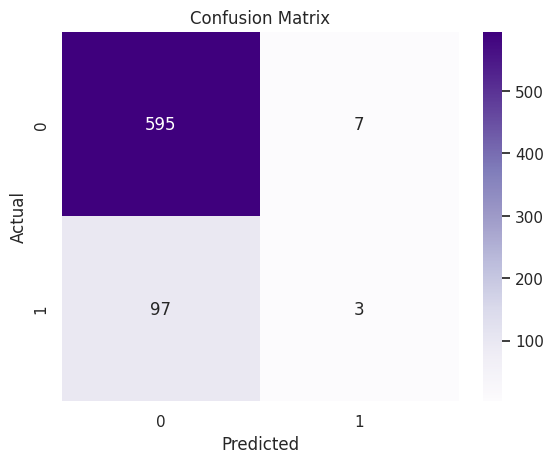

In [164]:
# 5.5 Evaluate the Model

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Compare Logistic Regression Performance: With vs Without Scaling

In [165]:
#Compare Logistic Regression Performance: With vs Without Scaling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Model without scaling


model_unscaled = LogisticRegression(max_iter=5000, solver='saga')
model_unscaled.fit(X_train, y_train)

y_pred_unscaled = model_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Model with scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=5000, solver='saga')
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without scaling:", round(acc_unscaled * 100, 2), "%")
print("Accuracy with scaling:   ", round(acc_scaled * 100, 2), "%")

Accuracy without scaling: 85.04 %
Accuracy with scaling:    85.19 %


**@Finding:**

Feature scaling had a small positive effect on the performance of the Logistic Regression model. Accuracy improved from 85.04% without scaling to 85.19% with scaling. Although the overall improvement is minor, scaling ensures better model convergence and more reliable coefficient estimation, particularly when applying linear models.